In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Загрузим данные и посмотрим на небольшую часть
data = pd.read_csv('./breast-cancer_1.csv')
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
num_cols = [
    'deg-malig',
]

cat_cols = [
    'class',
    'menopause',
    'breast-quad',
    'tumor-size',
    'inv-nodes',
    'node-caps',
    'breast',
    'age'
]

target_col = 'irradiat'

cols = num_cols + cat_cols + [target_col]

In [ ]:
data['irradiat'] = (data['irradiat'] == 'yes').astype(int)

In [ ]:
data = data.loc[data['breast-quad'] != '?']

# Посмотрим на распределение категориальных фичей
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

class DISTRIBUTION
no-recurrence-events    201
recurrence-events        84
Name: class, dtype: int64

menopause DISTRIBUTION
premeno    150
ge40       128
lt40         7
Name: menopause, dtype: int64

breast-quad DISTRIBUTION
left_low     110
left_up       97
right_up      33
right_low     24
central       21
Name: breast-quad, dtype: int64

tumor-size DISTRIBUTION
30-34    59
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

inv-nodes DISTRIBUTION
0-2      212
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

node-caps DISTRIBUTION
no     221
yes     56
?        8
Name: node-caps, dtype: int64

breast DISTRIBUTION
left     151
right    134
Name: breast, dtype: int64

age DISTRIBUTION
50-59    95
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64



In [ ]:
print(f"{data['irradiat']} DISTRIBUTION")
print(data['irradiat'].value_counts())
print()

0      0
1      0
2      0
3      0
4      0
      ..
281    0
282    1
283    0
284    0
285    0
Name: irradiat, Length: 285, dtype: int64 DISTRIBUTION
0    217
1     68
Name: irradiat, dtype: int64



In [ ]:
# Задание: Теперь добавьте в датафрейм колонки для всех категориальных фичей и обновите список категориальных фичей
data = pd.get_dummies(data, columns=cat_cols)
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

In [ ]:
data.head()

,deg-malig,irradiat,class_no-recurrence-events,class_recurrence-events,menopause_ge40,menopause_lt40,menopause_premeno,breast-quad_central,breast-quad_left_low,breast-quad_left_up,...,node-caps_no,node-caps_yes,breast_left,breast_right,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79
0,3,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,2,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
3,2,0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4,2,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[num_cols + cat_cols], data[target_col], test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# создание модели с указанием гиперпараметра C
clf = LogisticRegression(C=0.05, penalty='l2', max_iter = 1000)
# обучение модели
clf.fit(X_train, y_train)
# предсказание на тестовой выборке
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7017543859649122


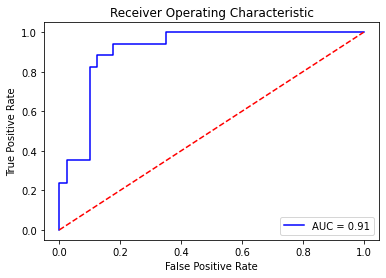

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

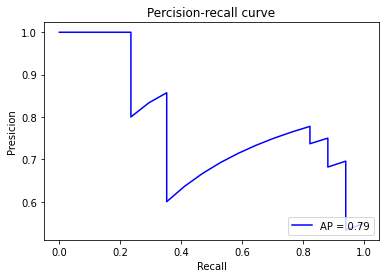

In [ ]:
# precision-recall curve
presicion, recall, threshold = metrics.precision_recall_curve(y_test, preds)
ap = metrics.average_precision_score(y_test, preds)
plt.title('Percision-recall curve')
plt.plot(recall, presicion, 'b', label = 'AP = %0.2f' % ap)
plt.legend(loc = 'lower right')
plt.ylabel('Presicion')
plt.xlabel('Recall')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# заново создадим модель, указав солвер
clf = LogisticRegression(solver='saga', max_iter = 1000)

# опишем сетку, по которой будем искать
param_grid = {
    'C': [0.003, 0.05, 0.01, 0.02, 0.007, 0.005], # также можно указать обычный массив, [1, 2, 3, 4]
    'penalty': ['l1', 'l2'],
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(X_train, y_train)

# выведем наилучшие параметры
print(search.best_params_)

{'C': 0.003, 'penalty': 'l1'}
